In [42]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [43]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [45]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [46]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [47]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

C:\Users\mnmat\AppData\Local\Temp\ipykernel_39824\4196587217.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [48]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [49]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [50]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [52]:
# Find the most recent date in the data set.
most_recent_day = session.query(func.max(Measurement.date)).scalar()
print(most_recent_day)


2017-08-23


In [53]:
most_recent_day

'2017-08-23'

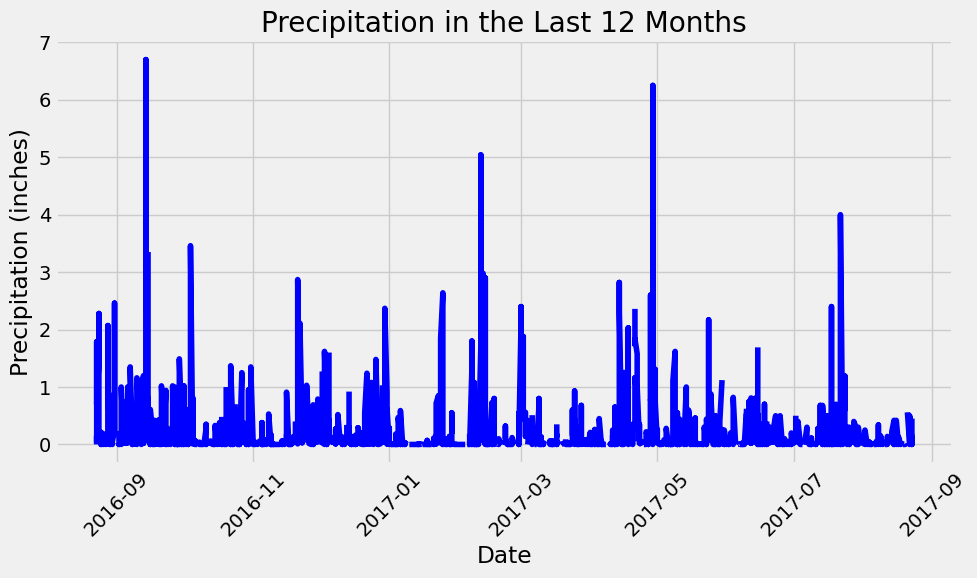

In [54]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = pd.to_datetime(most_recent_day)
# Calculate the date one year from the last date in data set.
twelve_month_prior = most_recent_date - dt.timedelta(days=365)

twelve_month_prior_str = twelve_month_prior.strftime('%Y-%m-%d')
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= twelve_month_prior_str).order_by(Measurement.date).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_data = pd.DataFrame(results, columns=['date', 'precipitation'])

# Sort the dataframe by date
precip_data['date'] = pd.to_datetime(precip_data['date'])  # Ensure the date is in datetime format
precip_data = precip_data.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6))
plt.plot(precip_data['date'], precip_data['precipitation'], color='b')
plt.title('Precipitation in the Last 12 Months')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [55]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = precip_data['precipitation'].describe().round(2)
summary_stats

count    2021.00
mean        0.18
std         0.46
min         0.00
25%         0.00
50%         0.02
75%         0.13
max         6.70
Name: precipitation, dtype: float64

# Exploratory Station Analysis

In [57]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.station).count()

9

In [58]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [59]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

<Axes: ylabel='Frequency'>

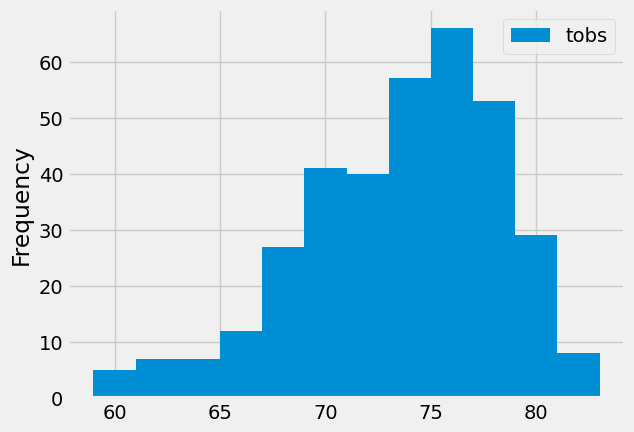

In [60]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results2 = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= twelve_month_prior_str).order_by(Measurement.date).all()
precip_data = pd.DataFrame(results2, columns=['tobs'])
precip_data.plot.hist(bins=12)


# Close Session

In [62]:
# Close Session
session.close()